# Маркетинговый анализ развлекательного приложения Procrastinate Pro+

При увеличении вложений в рекламу компания Procrastinate Pro+ терпит убытки.  

Задача этого исследования: 

- выявить откуда приходят пользователи и какими устройствами они пользуются,
- посчитать стоимость привлечения пользователей из различных рекламных каналов,
- посчитать сколько денег приносит каждый клиент,
- выявить условия окупаемости привлечению клиентов,
- выявить факторы привлечения клиентов.

Импортируем необходимые для работы библиотеки.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime, timedelta

### Загрузка данных

Запишем датасеты visits_info_short.csv, orders_info_short.csv, costs_info_short.csv в датафреймы visits, orders и  costs соответственно, посмотрим на их первые 5 строк и посмотрим информацию.

In [2]:
try:
    visits, orders, costs = (
        pd.read_csv('/datasets/visits_info_short.csv'),
        pd.read_csv('/datasets/orders_info_short.csv'),
        pd.read_csv('/datasets/costs_info_short.csv')
    )


except:
    visits, orders, costs = (
        pd.read_csv('visits_info_short.csv'),
        pd.read_csv('orders_info_short.csv'),
        pd.read_csv('costs_info_short.csv')
    )

In [3]:
print(visits.head())
print(visits.info())

        User Id         Region   Device  Channel        Session Start  \
0  981449118918  United States   iPhone  organic  2019-05-01 02:36:01   
1  278965908054  United States   iPhone  organic  2019-05-01 04:46:31   
2  590706206550  United States      Mac  organic  2019-05-01 14:09:25   
3  326433527971  United States  Android   TipTop  2019-05-01 00:29:59   
4  349773784594  United States      Mac  organic  2019-05-01 03:33:35   

           Session End  
0  2019-05-01 02:45:01  
1  2019-05-01 04:47:35  
2  2019-05-01 15:32:08  
3  2019-05-01 00:54:25  
4  2019-05-01 03:57:40  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  

`User Id` — уникальный идентификатор пользователя,  
`Region` — страна пользователя,  
`Device` — тип устройства пользователя,  
`Channel` — идентификатор источника перехода,  
`Session Start` — дата и время начала сессии,  
`Session End` — дата и время окончания сессии.  

In [4]:
print(orders.head())
print(orders.info())

        User Id             Event Dt  Revenue
0  188246423999  2019-05-01 23:09:52     4.99
1  174361394180  2019-05-01 12:24:04     4.99
2  529610067795  2019-05-01 11:34:04     4.99
3  319939546352  2019-05-01 15:34:40     4.99
4  366000285810  2019-05-01 13:59:51     4.99
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB
None


`User Id` — уникальный идентификатор пользователя,  
`Event Dt` — дата и время покупки,  
`Revenue` — сумма заказа.

In [5]:
print(costs.head())
print(costs.info())

           dt   Channel  costs
0  2019-05-01  FaceBoom  113.3
1  2019-05-02  FaceBoom   78.1
2  2019-05-03  FaceBoom   85.8
3  2019-05-04  FaceBoom  136.4
4  2019-05-05  FaceBoom  122.1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB
None


`dt` — дата проведения рекламной кампании,  
`Channel` — идентификатор рекламного источника,  
`costs` — расходы на эту кампанию.

В нашем распоряжении датафрейм visits с 5 столбцами и 309901 строками, датафрейм orders с 3 столбцами и 40212 строками и датафрейм costs с 3 столбцами и 1800 строками.

### Переименование столбцов

Приведем название столбцов к нижнему и "змеиному" регистру.

In [6]:
visits.columns = ['user_id', 'region', 'device', 'channel', 'session_start', 'session_end']
orders.columns = ['user_id', 'event_dt', 'revenue']
costs.columns = costs.columns.str.lower()
print(visits.columns)
print(orders.columns)
print(costs.columns)

Index(['user_id', 'region', 'device', 'channel', 'session_start',
       'session_end'],
      dtype='object')
Index(['user_id', 'event_dt', 'revenue'], dtype='object')
Index(['dt', 'channel', 'costs'], dtype='object')


### Проверка на дубли


проверим датафреймы на явные дубли

In [7]:
for i in (visits, orders, costs):
    print(f'Явных дублей в датафреме {i.duplicated().sum()}')

Явных дублей в датафреме 0
Явных дублей в датафреме 0
Явных дублей в датафреме 0


Явных дублей нет.

### Преобразование данных

Преобразуем данные в столбцах с датой в формат дат.

In [8]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

Проверим, что тип данных изменился.

In [9]:
print(visits['session_start'].dtype)
print(visits['session_end'].dtype)
print(orders['event_dt'].dtype)
print(costs['dt'].dtype)


datetime64[ns]
datetime64[ns]
datetime64[ns]
object


### Проверка на пропуски

Проверим датафреймы на пропуски.

In [10]:
for i in (visits, orders, costs):
    print(f'Пропусков в датафреме {i.isna().sum()}')

Пропусков в датафреме user_id          0
region           0
device           0
channel          0
session_start    0
session_end      0
dtype: int64
Пропусков в датафреме user_id     0
event_dt    0
revenue     0
dtype: int64
Пропусков в датафреме dt         0
channel    0
costs      0
dtype: int64


Пропусков нет.

**Вывод**  
Мы провели предобработку данных: переименовали столбцы, изменили тип данных в столбцах с датами, проверили на дубликаты и пропуски.  

## Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

### Функция для создания пользовательских профилей get_profiles().

In [11]:
def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())



    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

### Функция для расчёта удержания get_retention()

In [12]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

### Функция для расчёта конверсии get_conversion()

In [13]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

### Функция для расчёта LTV и ROI get_ltv()

In [14]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

### Функция для сглаживания фрейма filter_data()

In [15]:
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

### Функция для визуализации удержания plot_retention()

In [16]:
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

### Функция для визуализации конверсии plot_conversion()

In [17]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

### Функция для визуализации LTV и ROI plot_ltv_roi()

In [18]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

**Вывод**  
Мы подготовили 8 функций для дальнейшего анализа.

## Исследовательский анализ данных

- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируйте выводы.

### Профили пользователей

Получим таблицу профилей.

In [19]:
profiles = get_profiles(visits, orders, costs)
print(profiles.head())

    user_id            first_ts     channel  device         region  \
0    599326 2019-05-07 20:58:57    FaceBoom     Mac  United States   
1   4919697 2019-07-09 12:46:07    FaceBoom  iPhone  United States   
2   6085896 2019-10-01 09:58:33     organic  iPhone         France   
3  22593348 2019-08-22 21:35:48  AdNonSense      PC        Germany   
4  31989216 2019-10-02 00:07:44     YRabbit  iPhone  United States   

           dt      month  payer  acquisition_cost  
0  2019-05-07 2019-05-01   True          1.088172  
1  2019-07-09 2019-07-01  False          1.107237  
2  2019-10-01 2019-10-01  False          0.000000  
3  2019-08-22 2019-08-01  False          0.988235  
4  2019-10-02 2019-10-01  False          0.230769  


### Минимальнуая и максимальная даты привлечения пользователей.

In [20]:
print('Минимальная дата привлечения пользоваителей - ', profiles['dt'].min())
print('Максимальная дата привлечения пользоваителей - ', profiles['dt'].max())

Минимальная дата привлечения пользоваителей -  2019-05-01
Максимальная дата привлечения пользоваителей -  2019-10-27


Мы видим, что у нас данные с 1 мая 2019 года по 27 октября 2019 года.

### Анализ стран

Выясним, из каких стран приходят пользоватлеи.

In [21]:
profiles['region'].unique()

array(['United States', 'France', 'Germany', 'UK'], dtype=object)

В наших данных пользователи из США, Франции, Германии, Великобритании.

Выясним на какую страну приходится больше всего платящих пользователей.

Для начала сделаем функцию, которая поможет нам в дальнейшем, она будет принимать таблицу профилей и столбец, по которому мы хотим провести анализ, а выдавать сгруппированную таблицу и графики.

In [22]:
def get_info(
    profiles,
    dimensions=[]
):
    #если не задан фильр, то функция будет выводить разделение по региону
    if len(dimensions) == 0:
        
        dimensions = ['region']
    
    info_table = (
        #группируем данные по dimensions
        profiles.groupby(dimensions)
        #считаем количество уникальных пользователей
        .agg({'user_id': 'nunique' })
        #переименовываем колонку
        .rename(columns={'user_id': 'total_users'})
        #сбрасываем индексы
        .reset_index()
        #присоединяем таблицу с уникальными платящими пользователями сгруппированными по dimensions
        .merge(profiles.query('payer == True').groupby(dimensions)
        .agg({'user_id': 'nunique' })
        .rename(columns={'user_id': 'payers'})
        .reset_index(), 
        on = dimensions, how = 'left')
              )
    
    #считаем процент платящих пользователей
    info_table['percentage_of_paying_users'] = info_table['payers'] / info_table['total_users'] * 100
    #сортируем таблицу по убыванию значения процента платящих пользователей
    info_table = info_table.sort_values(by='percentage_of_paying_users', ascending = False)
    print(info_table)
    
    #графики будем строить по топ 5  компаниям по количеству платящих пользователей
    info_table_top_5 = (info_table.sort_values(by='payers', ascending = False)
    .head()
    .sort_values(by='percentage_of_paying_users', ascending = False))
    
        #задаем размеры общего графика
    fig, ax = plt.subplots(1, 2, figsize=(14,12))
    fig.subplots_adjust(top=1.4, wspace= 1,)
    
    if dimensions == ['region']:
        fig.suptitle('Распределение пользователей по региону', fontsize=20)
    else:
        if dimensions == ['device']:
            fig.suptitle('Распределение пользователей по устройствам', fontsize=20)
        else:
            if dimensions == ['channel']:
                fig.suptitle('Распределение пользователей по каналам привлечения', fontsize=20)
            else:
                fig.suptitle(f'Распределение пользователей по каналам {dimensions}', fontsize=20)
                    
    #создаем круговую диаграмму пользователей
    ax[0].pie(info_table_top_5['total_users'],
              labels=info_table_top_5.iloc[:,0],
              radius = 1.1,
              autopct='%.0f%%')
    ax[0].set_title('Распределение всех пользователей', fontsize=12)


    # создаем диаграмму распределения платящих пользователей:
    ax[1].pie(info_table_top_5['payers'],
              labels=info_table_top_5.iloc[:, 0],
              radius = 1.1,
              autopct='%.0f%%')
    ax[1].set_title('Распределение платящих пользователей', fontsize=12)
    
    plt.show();
    
    #создаем график с долей платящих пользователей

    fig, ax = plt.subplots(figsize=(8,4))

    bar_colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red',  'tab:purple']

    ax.bar(info_table_top_5.iloc[:, 0], info_table_top_5['percentage_of_paying_users'], color=bar_colors)
    ax.set_ylabel('% Платящих пользователей')
    
    ax.set_title(f'Доля платящих пользователей по {dimensions}')
    if dimensions == ['region']:
        ax.set_title('Доля платящих пользователей по региону')
    else:
        if dimensions == ['device']:
            ax.set_title('Доля платящих пользователей по устройствам')
        else:
            if dimensions == ['channel']:
                ax.set_title('Доля платящих пользователей по каналам привлечения')
            else:
                ax.set_title(f'Доля платящих пользователей по {dimensions}')

    plt.show()

Теперь получим информацию по регионам.

          region  total_users  payers  percentage_of_paying_users
3  United States       100002    6902                    6.901862
1        Germany        14981     616                    4.111875
2             UK        17575     700                    3.982930
0         France        17450     663                    3.799427


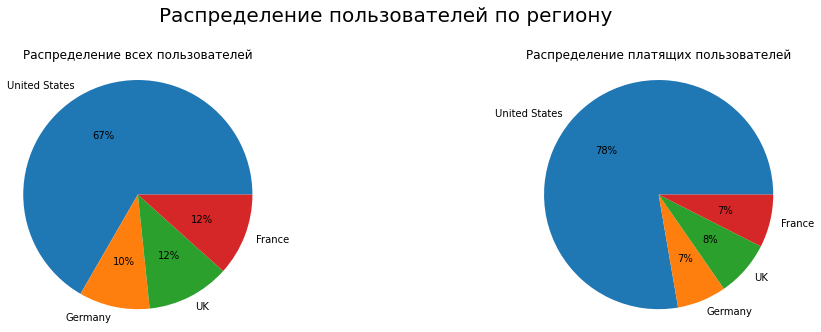

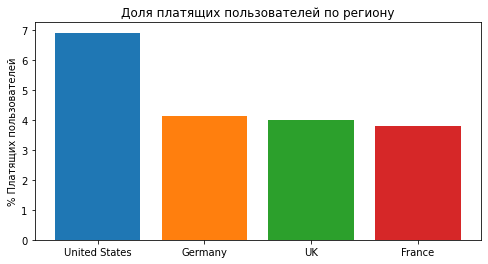

In [23]:
get_info(profiles, dimensions=['region'])

Больше всего пользователей из США - 67%, и оттуда же самая большая доля платящих - 6,9%. Меньше всего пользователей из Германии - 10 %, а самая малая доля платящих во Франции - 3,8%.  

Больше всего пользователей из США (67%), и оттуда же самая большая доля платящих - 6,9%. Меньше всего пользователей из Германии, а самая малая доля платящих во Франции - 3,8%.  

### Устройства пользователей

Выясним, какими устройствами предпочитают пользоваться платящие пользователи.

    device  total_users  payers  percentage_of_paying_users
1      Mac        30042    1912                    6.364423
3   iPhone        54479    3382                    6.207897
0  Android        35032    2050                    5.851793
2       PC        30455    1537                    5.046790


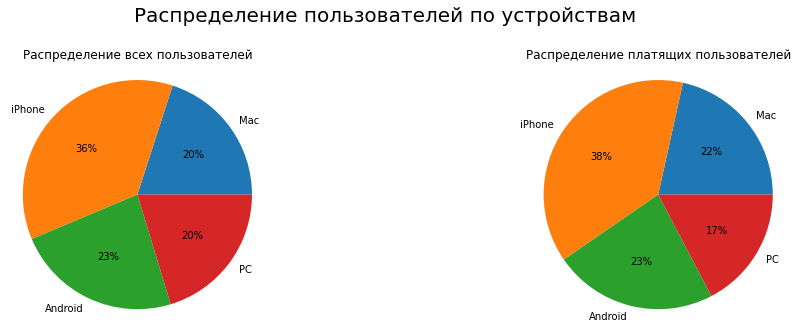

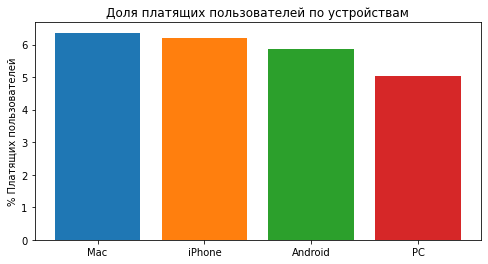

In [24]:
get_info(profiles, dimensions=['device'])

Больше всего юзеров, в т.ч. и платящих пользуется платформой iPhone, на втором месте - Android. Но самый высокий процент платящих пользорвателей пользуется платформой Mac. хоть это и самая малочисленная платформа.

### Рекламные источники

Проанализируем рекламыне источники и выясним, по каким каналам приходит больше всего платящих пользователей.

               channel  total_users  payers  percentage_of_paying_users
1             FaceBoom        29144    3557                   12.204914
0           AdNonSense         3880     440                   11.340206
9       lambdaMediaAds         2149     225                   10.469986
6               TipTop        19561    1878                    9.600736
5       RocketSuperAds         4448     352                    7.913669
7       WahooNetBanner         8553     453                    5.296387
8              YRabbit         4312     165                    3.826531
3         MediaTornado         4364     156                    3.574702
2              LeapBob         8553     262                    3.063253
4   OppleCreativeMedia         8605     233                    2.707728
10             organic        56439    1160                    2.055316


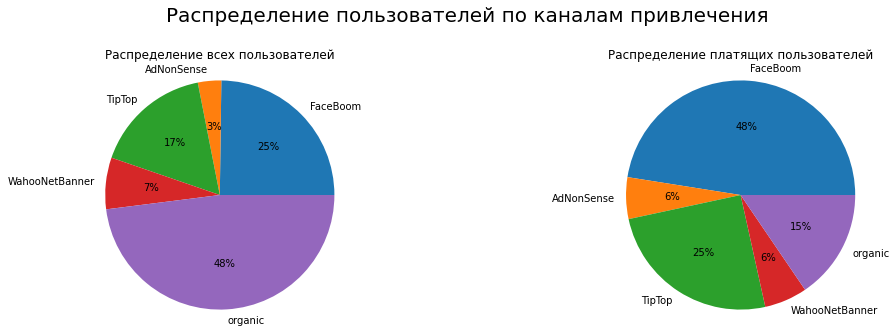

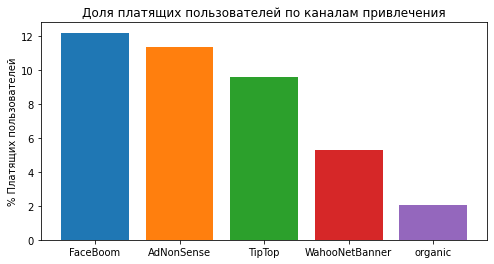

In [25]:
get_info(profiles, dimensions=['channel'])

Больше всего платящих пользователей прихлжит по каналу FaceBoom, при этом с этого канала самая большая доля платящих пользователей. С TipTop также приходит много платящих пользователей (по этому показателю этот канал второй), но доля платящих уступает AdNonSense и lambdaMediaAds, пользователей с которых приходит в разы меньше. По органическому поиску приходит много клиентов (третий показатель), но по доле платязих - это самый минимальный уровень. Такая доля органического трафика не является хорошим показателем, в SEO среде считается, что она должна быть от 60 %, и есть вероятность, что у сайтом компании есть проблемы, или есть проблемы с его показом в поиске.

**Вывод**  
В датасете у нас данные с 1 мая 2019 года по 27 октября 2019 года.
Прелставлены пользователи из США, Франции, Германии, Великобритании. Больше всего пользователей из США, и оттуда же самая большая доля платящих - 6,9%. Меньше всего пользователей из Германии, а самая малая доля платящих во Франции - 3,8%.  
Больше всего юзеров, в т.ч. и платящих пользуется платформой iPhone, на втором месте - Android. Но самый высокий процент платящих пользорвателей пользуется платформой Mac. хоть это и самая малочисленная платформа.
Больше всего платящих пользователей придит по каналу FaceBoom, при этом с этого канала самая большая доля платящих пользователей. С TipTop также приходит много платящих пользователей (по этому показателю этот канал второй), но доля платящих уступает AdNonSense и lambdaMediaAds, пользователей с которых приходит в разы меньше. По органическому поиску приходит много клиентов (третий показатель, но не оптимальный), но по доле платящих - это самый минимальный уровень.

## Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

### Расходы на маркетинг

Посчитаем общие расходы на маркетинг.

In [26]:
costs['costs'].sum()

105497.30000000002

Всего на маркетинг потрачено 105479.

### Расппределение трат по рекламынм источникам

Посчитаем, как распределениы траты по рекламым источникам.

                       costs
channel                     
TipTop              54751.30
FaceBoom            32445.60
WahooNetBanner       5151.00
AdNonSense           3911.25
OppleCreativeMedia   2151.25
RocketSuperAds       1833.00
LeapBob              1797.60
lambdaMediaAds       1557.60
MediaTornado          954.48
YRabbit               944.22


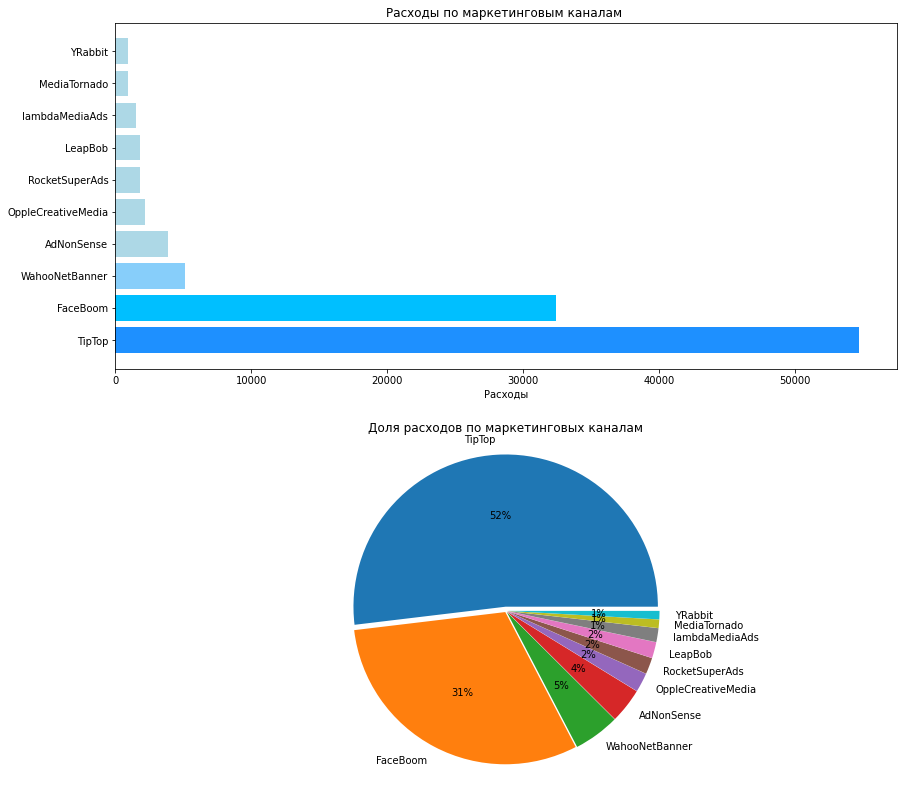

In [27]:
all_costs = costs.groupby('channel').agg({'costs': 'sum'}).sort_values(by='costs', ascending=False)
print(all_costs)

fig, ax = plt.subplots(2, 1, figsize=(14,14))

bar_colors = ['dodgerblue', 'deepskyblue', 'lightskyblue',  
              'lightblue','lightblue', 'lightblue','lightblue','lightblue', 'lightblue','lightblue',]

ax[0].barh(all_costs.index, all_costs['costs'], color=bar_colors)
ax[0].set_xlabel('Расходы')
ax[0].set_title('Расходы по маркетинговым каналам ')


    # создаем диаграмму распределения платящих пользователей:
ax[1].pie(all_costs['costs'],
              labels=all_costs.index,
              radius = 1.1,
              autopct='%.0f%%',
             explode=[0.03, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01])
ax[1].set_title('Доля расходов по маркетинговых каналам', fontsize=12)

plt.show()



Самые большие расходы на маркетинг идут на канал TipTop (52%), на втором месте FaceBoom (31%), на все остальные каналы тратится в разы меньше.

### Расходы на маркетинг по времени

Посмотрим, как менялись расходы на маркетинг по времени: по дням, неделям, месяцам.

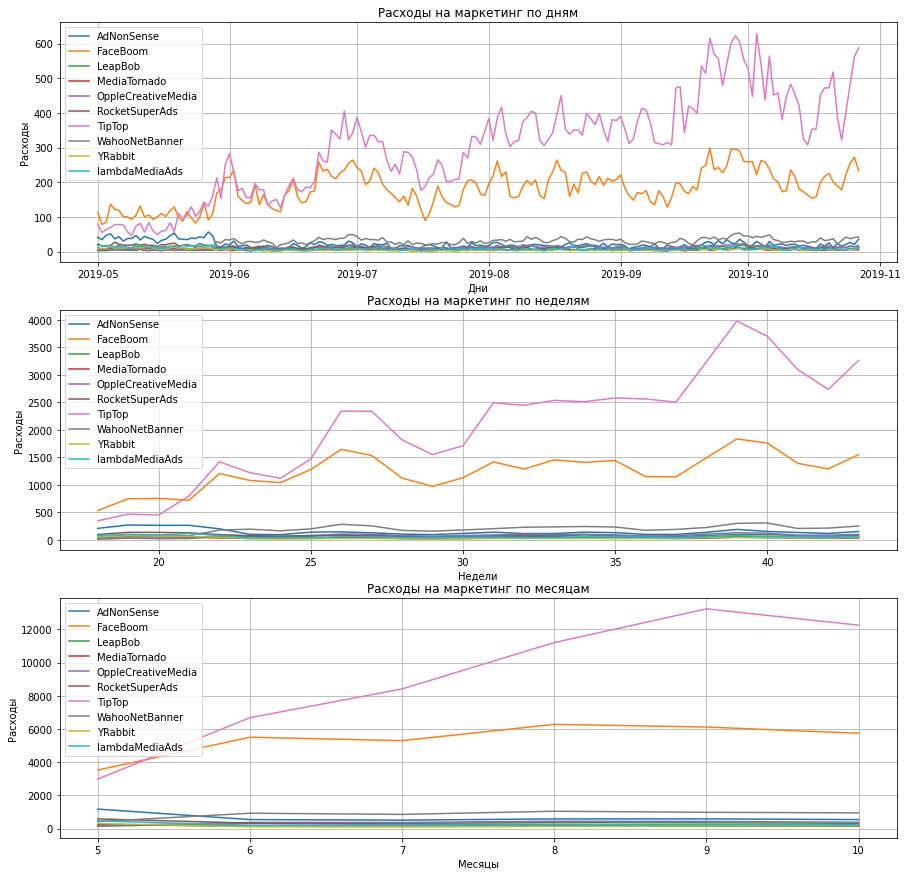

In [28]:
#добавим номер недели
costs['week'] = pd.to_datetime(costs["dt"]).dt.isocalendar().week 
#добавим месяц
costs['month'] = pd.to_datetime(costs["dt"]).dt.month

#создаем область для графика
plt.figure(figsize=(15, 15))

#делаем цикл для построения графиков

ax1 = plt.subplot(3, 1, 1)
    #группируем данные по требуемому сроку
costs.pivot_table(
        index='dt',
        values='costs',
        aggfunc='sum',
        columns='channel').plot(grid=True, ax=ax1)
plt.xlabel('Дни')
plt.title('Расходы на маркетинг по дням')
    
plt.ylabel('Расходы')
plt.legend(loc='upper left')
    
ax2 = plt.subplot(3, 1, 2)
    #группируем данные по требуемому сроку
costs.pivot_table(
        index='week',
        values='costs',
        aggfunc='sum',
        columns='channel').plot(grid=True, ax=ax2)
plt.xlabel('Недели')
plt.title('Расходы на маркетинг по неделям')
    
plt.ylabel('Расходы')
plt.legend(loc='upper left')
    
ax3 = plt.subplot(3, 1, 3)
    #группируем данные по требуемому сроку
costs.pivot_table(
        index='month',
        values='costs',
        aggfunc='sum',
        columns='channel').plot(grid=True, ax=ax3)
plt.xlabel('Месяцы')
plt.title('Расходы на маркетинг по месяцам')

plt.ylabel('Расходы')
plt.legend(loc='upper left')
    

#выводим общий график
plt.show();


Мы видим, что самые большие расходы были на каналы TipTop и FaceBoom. Можем сказать, что за исследуемый период расходы на эти каналы росли со временем. На остальные каналы расходы относительно небольшие и не менялись практически со временем.

### Стоимость привлечения пользователей

Посчитаем среднюю стоимость привлечения пользователя по каналам.

In [29]:
profiles.head(10)

user_id            first_ts       channel   device         region  \
0    599326 2019-05-07 20:58:57      FaceBoom      Mac  United States   
1   4919697 2019-07-09 12:46:07      FaceBoom   iPhone  United States   
2   6085896 2019-10-01 09:58:33       organic   iPhone         France   
3  22593348 2019-08-22 21:35:48    AdNonSense       PC        Germany   
4  31989216 2019-10-02 00:07:44       YRabbit   iPhone  United States   
5  34186288 2019-05-09 17:29:23       organic  Android  United States   
6  38448301 2019-08-16 11:56:00       organic  Android  United States   
7  46006712 2019-06-30 03:46:29    AdNonSense  Android         France   
8  58263264 2019-05-11 19:18:43      FaceBoom   iPhone  United States   
9  59835779 2019-05-11 21:13:47  MediaTornado   iPhone  United States   

           dt      month  payer  acquisition_cost  
0  2019-05-07 2019-05-01   True          1.088172  
1  2019-07-09 2019-07-01  False          1.107237  
2  2019-10-01 2019-10-01  False          0.000000  
3  2019-08-22 2019-08-01  False          0.988235  
4  2019-10-02 2019-10-01  False          0.230769  
5  2019-05-09 2019-05-01  False          0.000000  
6  2019-08-16 2019-08-01  False          0.000000  
7  2019-06-30 2019-06-01   True          1.008000  
8  2019-05-11 2019-05-01  False          1.128205  
9  2019-05-11 2019-05-01  False          0.250435

                         cac
channel                     
LeapBob             0.210172
MediaTornado        0.218717
YRabbit             0.218975
OppleCreativeMedia  0.250000
RocketSuperAds      0.412095
WahooNetBanner      0.602245
lambdaMediaAds      0.724802
AdNonSense          1.008054
FaceBoom            1.113286
TipTop              2.799003


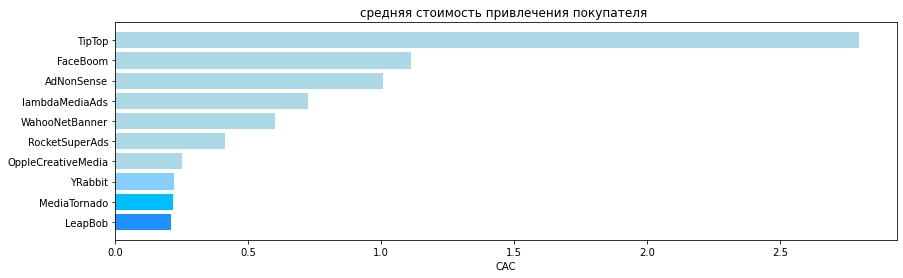

In [30]:
#сгруппируем данные по каналам и возьмем среднее по стомости привлечения
cac_profiles = (profiles.query('channel != "organic"').groupby(['channel'])
    #считаем количество уникальных пользователей
    .agg({'acquisition_cost': 'mean' })
    #переименовываем колонку
    .rename(columns={'acquisition_cost': 'cac'})).sort_values(by='cac')
print(cac_profiles)

#визуализируем данные
fig, ax = plt.subplots(figsize=(14,4))

bar_colors = ['dodgerblue', 'deepskyblue', 'lightskyblue',  
              'lightblue','lightblue', 'lightblue','lightblue','lightblue', 'lightblue','lightblue',]

ax.barh(cac_profiles.index, cac_profiles['cac'], color=bar_colors)
ax.set_xlabel('CAC')
ax.set_title('средняя стоимость привлечения покупателя ')


plt.show()

Мы видим, что самая низкая стоимость привлечение покупателя у LeapBob, а вот у TipTop стоимость привлечения покупателя в разы больше, чем у всех остальных каналов.

**Вывод**  
Всего на маркетинг потрачено 105479.  

Самые большие расходы на маркетинг идут на канал TipTop, на втором месте FaceBoom, на все остальные каналы тратится в разы меньше. Можем сказать, что за исследуемый период расходы на эти каналы ( TipTop и FaceBoom) росли со временем. На остальные каналы расходы относительно небольшие и не менялись практически со временем.  

Самая низкая стоимость привлечение покупателя у RocketSuperAds, а вот у TipTop стоимость привлечения покупателя в разы больше, чем у всех остальных каналов.

## Оцените окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

Проанализируем окупаемость рекламы с помощью графиков LTV и ROI.

Считаем, что сегодня 1 ноября 2019 года, а горизонт анализа - 14 дней. И в нашем анализе не учитываем органических пользователей, т.к. мы анализируем рекламу, а органический канал не рекламный.

In [31]:
observation_date = datetime(2019, 11, 1).date()  # момент анализа
horizon_days = 14  # горизонт анализа 

In [32]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles.query('channel != "organic"'), orders, observation_date, horizon_days
)

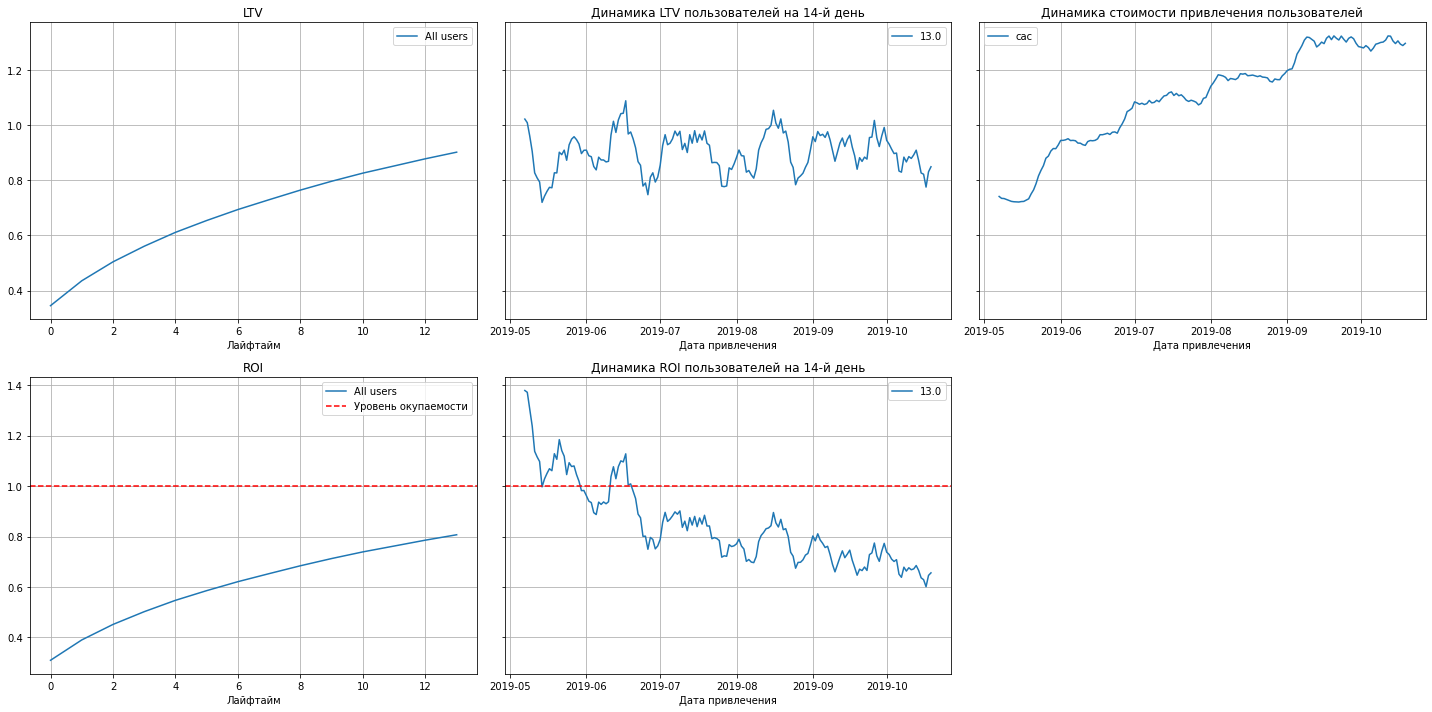

In [33]:
# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

По графикам можно сделать следующие выводы:  
Реклама не окупается. ROI в конце второй недели не доходит до 100%. При этом до июня реклама окупалась.  
CAC растет, возможно дело не в увеличении рекламного бюджета.  
На LTV, возможно, влияет сезонный фактор, но и этот показатель достаточно стабилен. Значит, дело не в ухудшении качества пользователей.

### Окупаемость рекламы в зависисмости от устройства пользователей

Посмотрим на окпуаемость рекламы с разбивкой по устройствам.

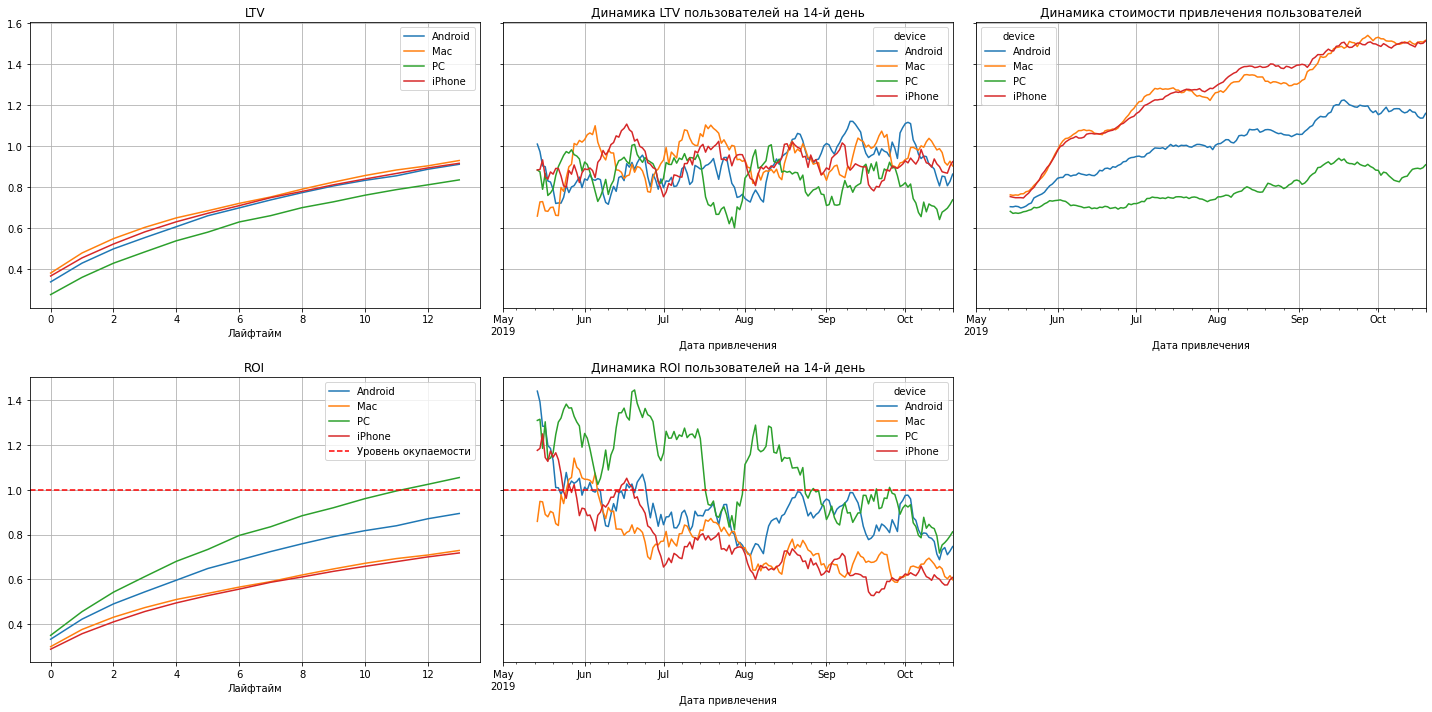

In [34]:
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles.query('channel != "organic"'), orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Вот что говорят графики:  
Реклама окупается только у пользователей PC.
Стоимость привлечения растет для всех пользователей.
LTV всё так же подвержен сезонности, но стабилен.  
ROI падает для всех пользователей за изучаемый период.


Посмотрим на конверсию

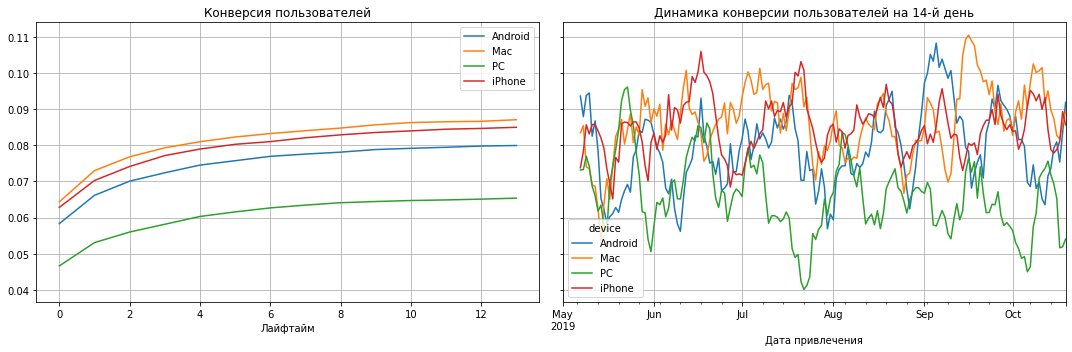

In [35]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles.query('channel != "organic"'), orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

При этом конверсия у пользователей PC хуже, чем у MAC и iPhone.

Посмотрим на удержание пользователей в зависимости от утройства.

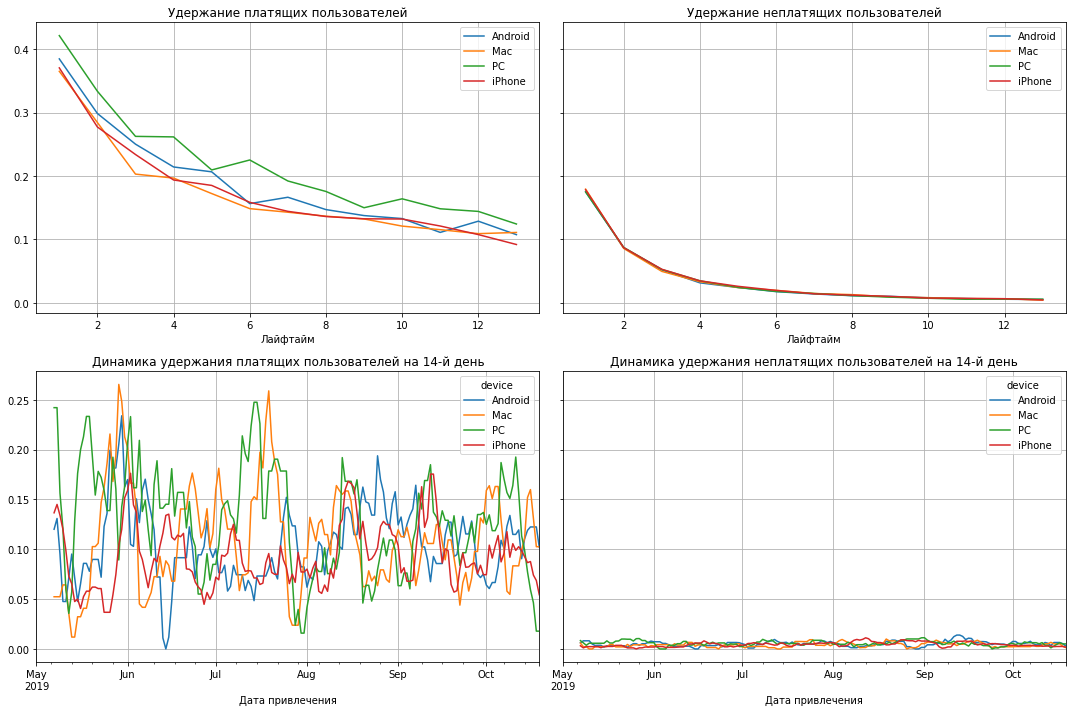

In [36]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles.query('channel != "organic"'), visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Удержание пользователей Mac и iPhone практически не отличается от пользователей Android и PC.

Резюмируя:
ROI падает для всех пользователей за изучаемый период.  
Удержание пользователей схожа для всех пользователей.  
Реклама окупается только у пользователей PC, при том, что их конверсия хуже, чем у у MAC и iPhone.  
Стоимость привлечения растет для всех пользователей. LTV всё так же подвержен сезонности, но стабилен.

### Окупаемость рекламы в зависисмости от региона пользователей

Посмотрим на окпуаемость рекламы с разбивкой по регионам.

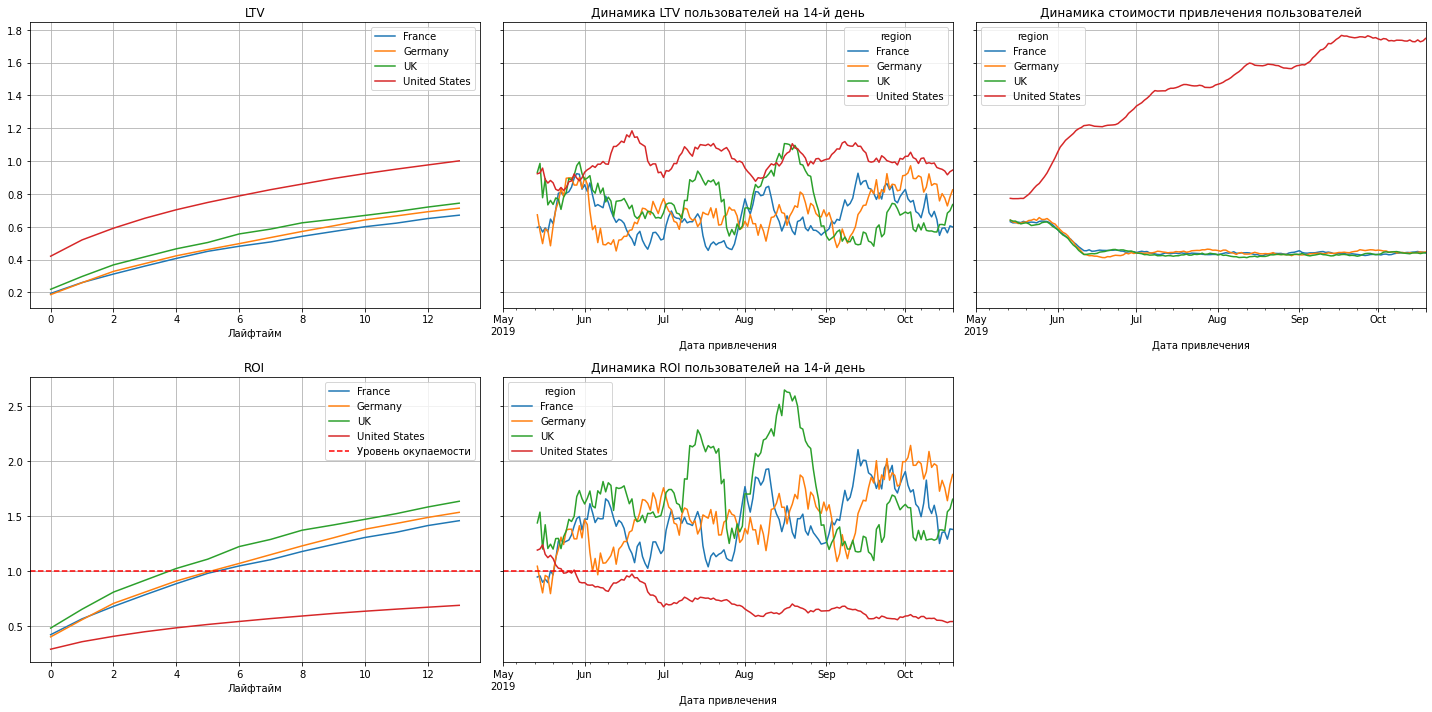

In [37]:
dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles.query('channel != "organic"'), orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

По графикам моем сделать вывод:  
Не окупаются пользователи из США.  
Стоимость привлечения для клиентов из США растет, в отличии от других рынков, а окупаемость становится хуже.  
Ранее пользоватлеи из США окупались.  

Посмотрим на конверсию

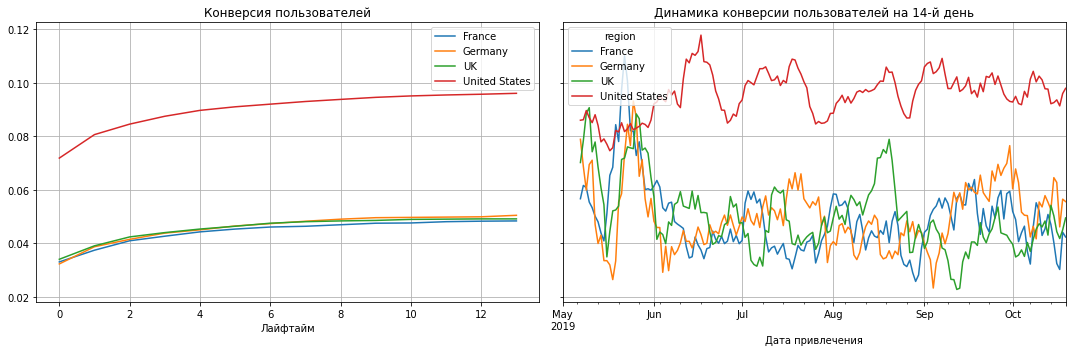

In [38]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles.query('channel != "organic"'), orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

При этом конверсия у пользователей США лучше, чем у пользователей из других регоинов.

Посмотрим на удержание пользователей в зависимости от региона.

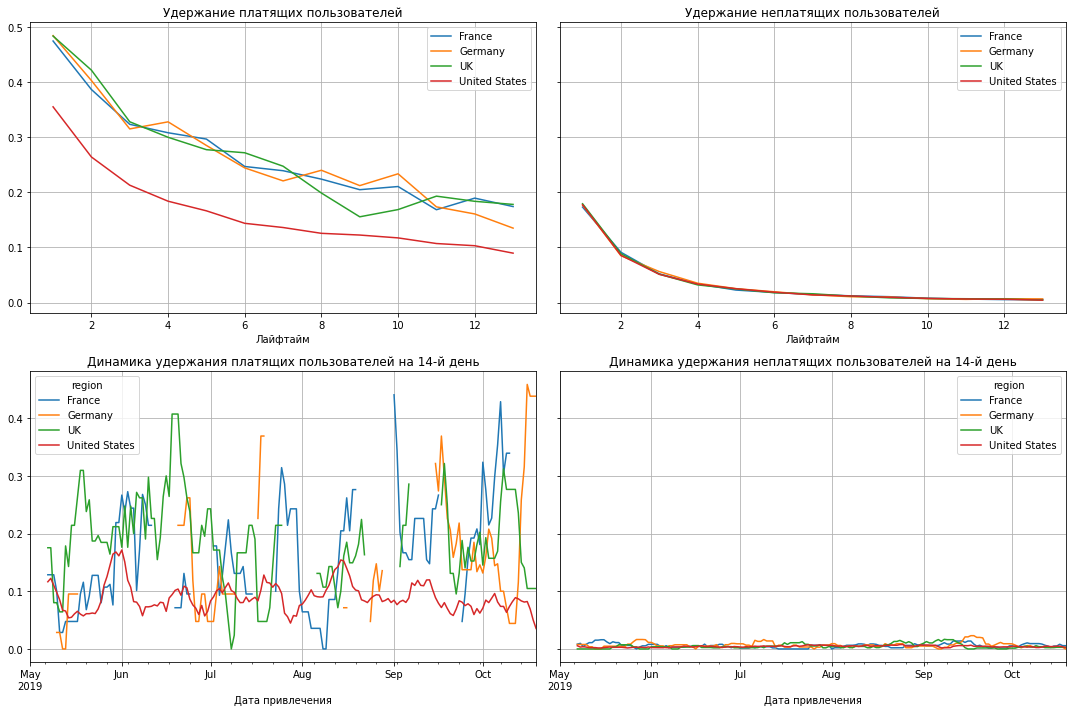

In [39]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles.query('channel != "organic"'), visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Удержание пользователей ищз США хуже, чем у пользователей из други регионов.

Резюме:  
Не окупаются пользователи из США.  
Стоимость привлечения для клиентов из США растет, в отличии от других рынков.  
Ранее пользоватлеи из США окупались.  
При этом конверсия у пользователей США лучше, чем у пользователей из других регоинов.  
Удержание пользователей ищз США хуже, чем у пользователей из други регионов.

### Окупаемость рекламы в зависисмости от канала привлечения пользователей

Посмотрим на окпуаемость рекламы с разбивкой по каналам привлечения.

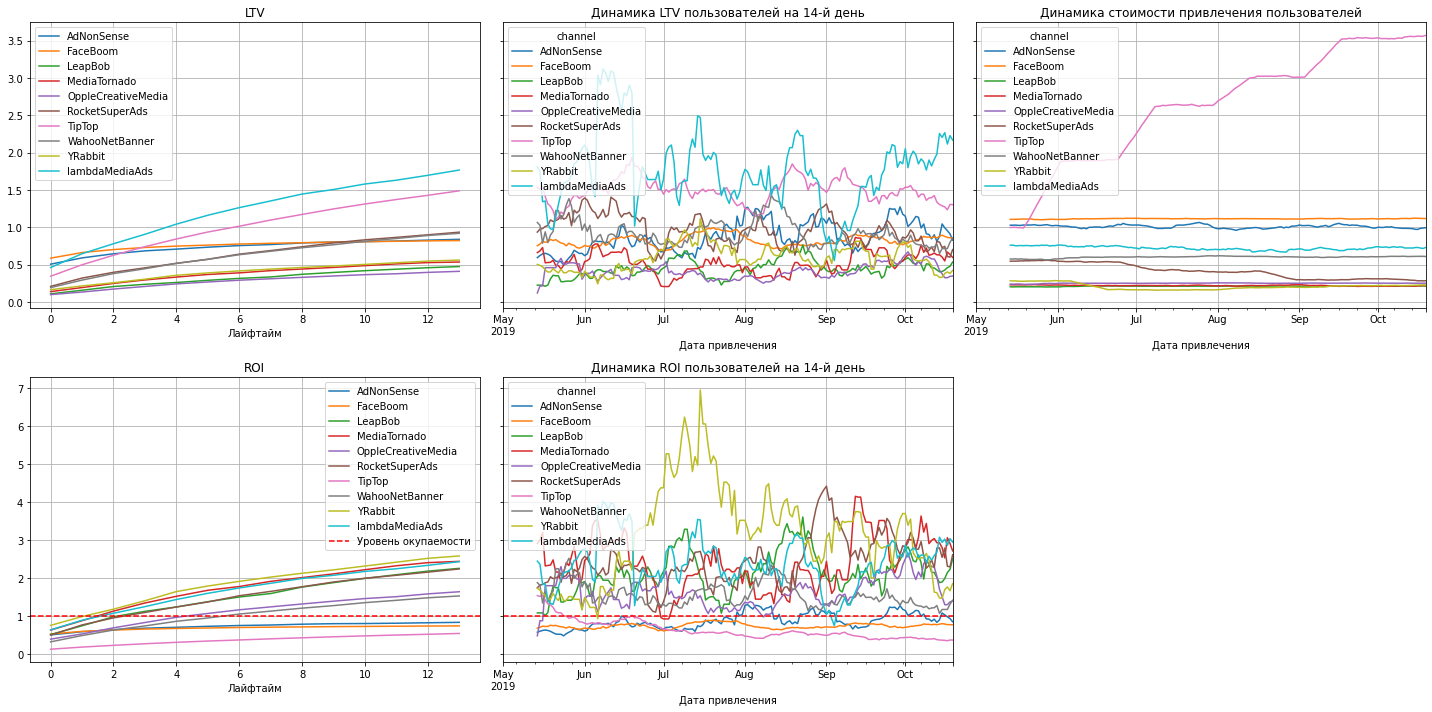

In [40]:
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles.query('channel != "organic"'), orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

По графикам моем сделать вывод:
Не окупаются пользователи из каналов TipTop, FaceBoom и AdNonSense.
Стоимость привлечения для клиентов по TipTop растет, в отличии от других каналов.  
Ранее пользоватеи из TipTop окупались, AdNonSense периодически окупались, а FaceBoom не окупались никогда.  
Пользователи из канала lambdaMediaAds показывают лучший LTV при стабильной стоимости привлечения, а за последние месяцы окупаемость растет.  
Пользователи из канала YRabit показывают лучшую окупаемость и одну из самых низких стоимостей привлечения, но окупаемость ухудшилась, по сравнению с июлем-августом.

Посмотрим на конверсию

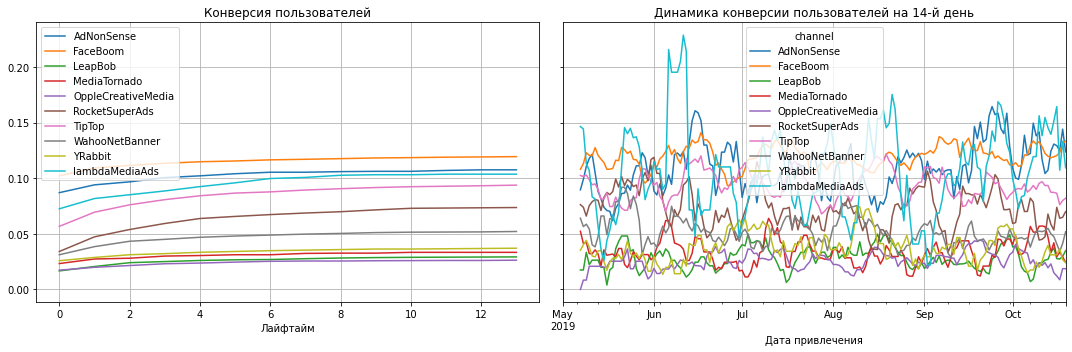

In [41]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles.query('channel != "organic"'), orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Конверсия пользователей из TipTop, FaceBoom и AdNonSense одна из лучших. И пользователи из LambdaMediaAds показывают один из лучших показателей конверсии.

Посмотрим на удержание пользователей в зависимости от каналов привлечения.

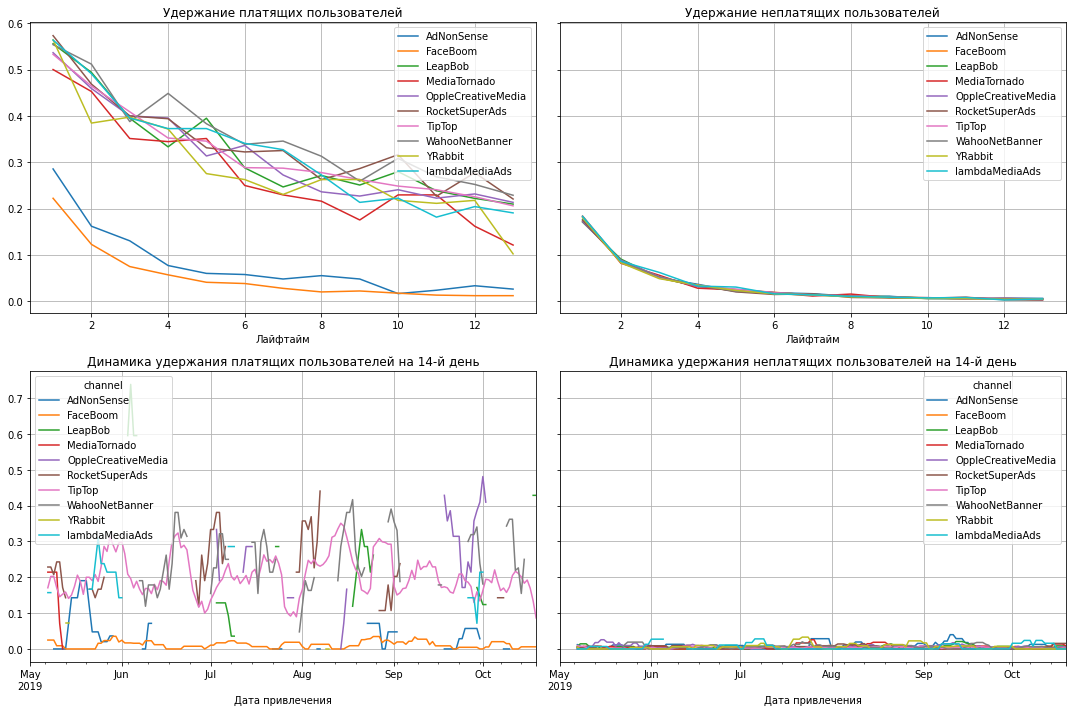

In [42]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles.query('channel != "organic"'), visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

А удержание FaceBoom и AdNonSense самые худшие.

Резюме:  
Не окупаются пользователи из каналов TipTop, FaceBoom и AdNonSense.
Стоимость привлечения для клиентов по TipTop растет, в отличии от других каналов.  
Ранее пользоватлеи из TipTop окупались, AdNonSense периодически окупались, а FaceBoom не окупались никогда.  
Конверсия пользователей из TipTop, FaceBoom и AdNonSense одна из лучших.  
А удержание FaceBoom и AdNonSense самые худшие.  
Пользователи из канала lambdaMediaAds показывают лучший LTV при стабильной стоимости привлечения, и показывают один из лучших показателей конверсии, а за последние месяцы окупаемость растет.

### Окупаемость рекламы в проблемных группах

#### Окупаемость пользователей из США

Мы увидели, что не окупаются пользователи из США, пользователи MAC и iPhone, и пользователи пришедшие из каналов TipTop, FaceBoom и AdNonSense.  
Попробуем локализовать проблему еще лучше.

Посмотрим, какие показатели ROI и LTV только у пользователей из США в зависимости от устройства.

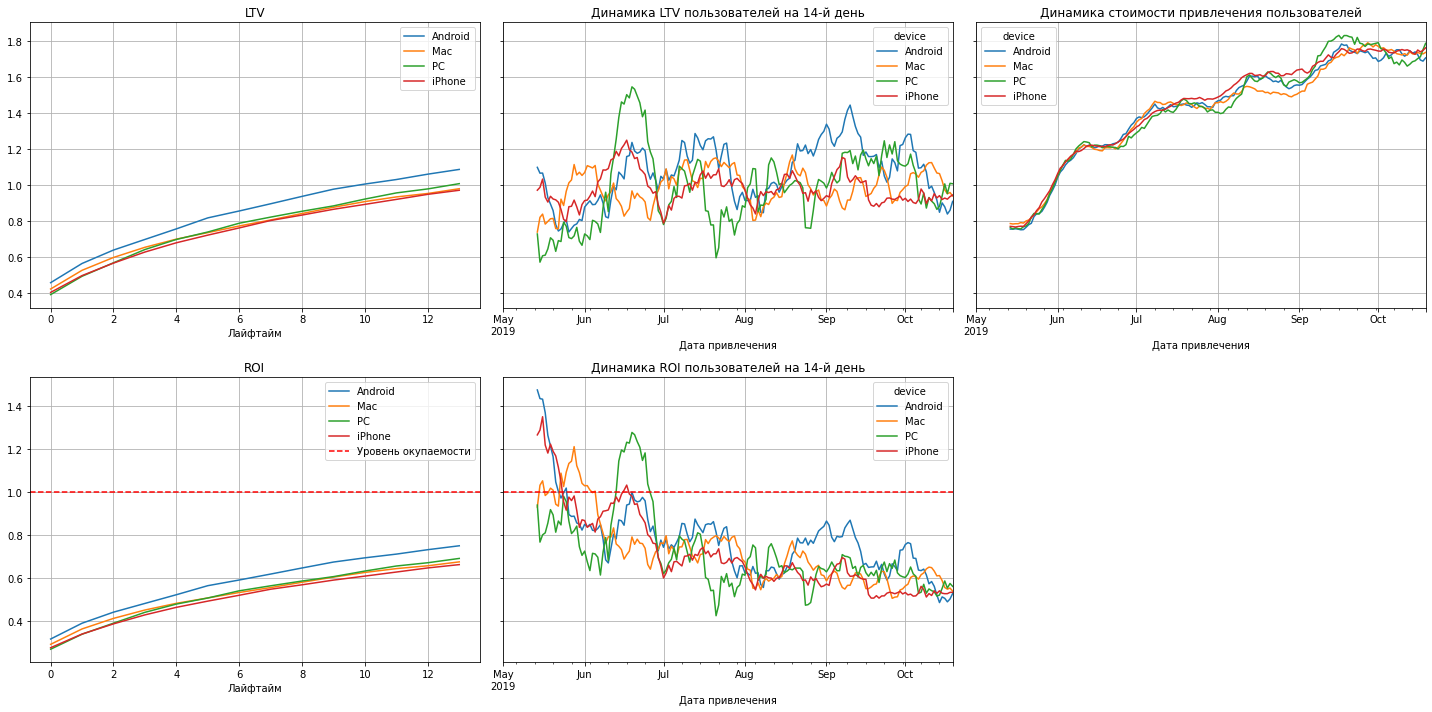

In [43]:
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles.query('channel != "organic" & region == "United States"'), orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Реклама не окупается сейчас стабильно на всех устройствах для пользователей из США, при этом до июня она окупалась.

Посмотрим, как окупаются пользователи из США в зависимости от канала привлечения.

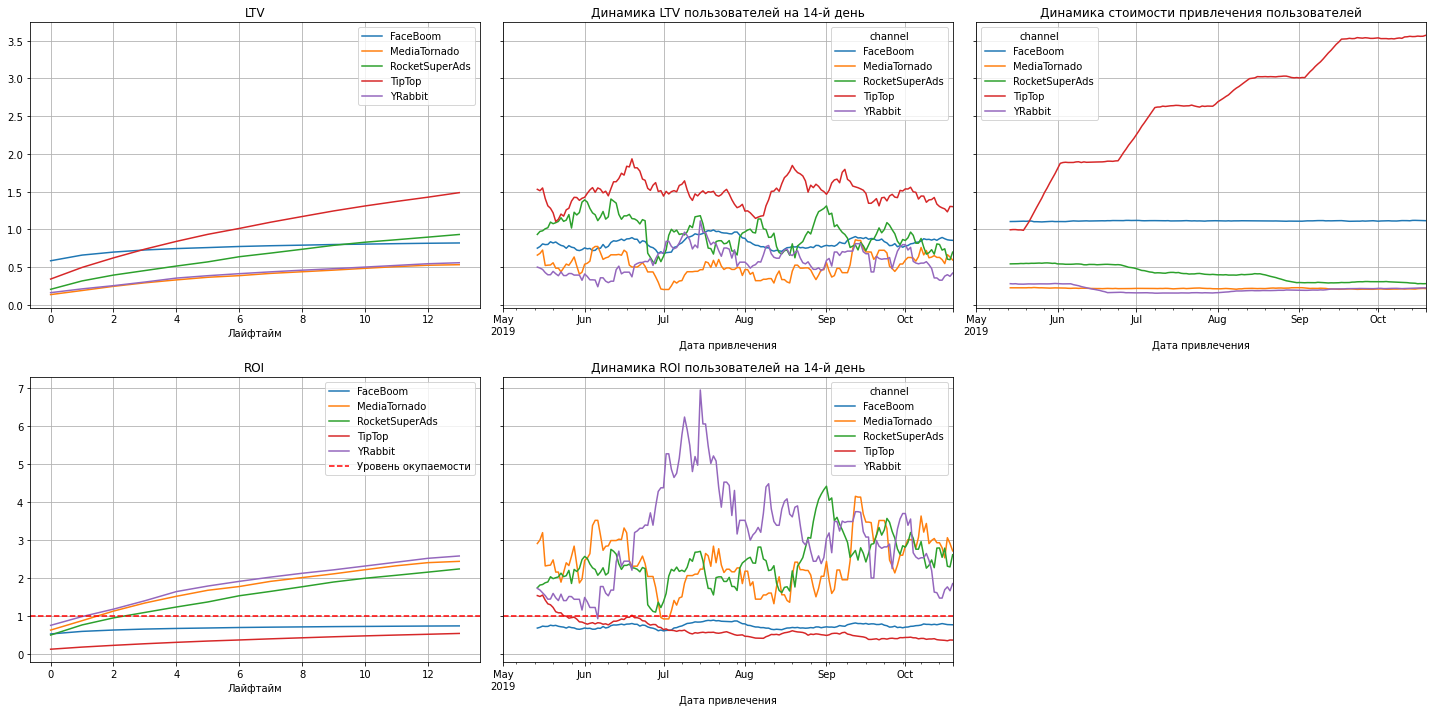

In [44]:
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles.query('channel != "organic" & region == "United States"'), orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Не окупаются пользователи, привлеченные по каналам FaceBoom и TipTop.  А лучше всего окупаются пользователи из канала yRabit.
Посмотрим на конверсию.

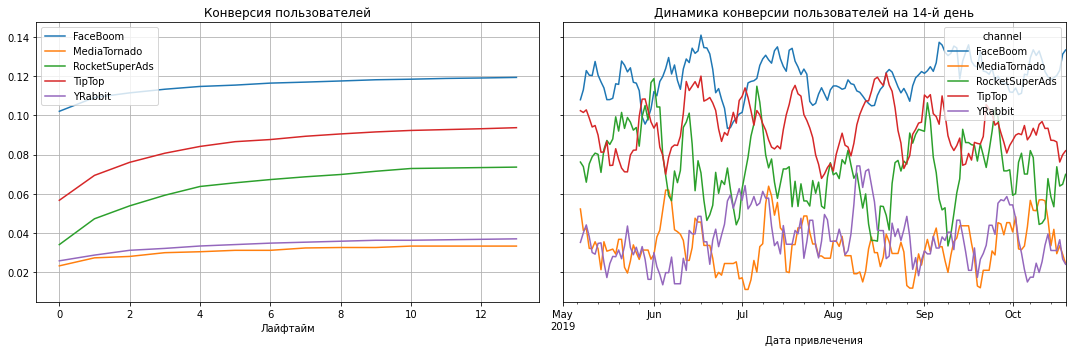

In [45]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles.query('channel != "organic" & region == "United States"'), orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

При этом конверсия у FaceBoom и TipTop лучше, чем у пользователей из других каналов.  
Посмотрим на удержание.

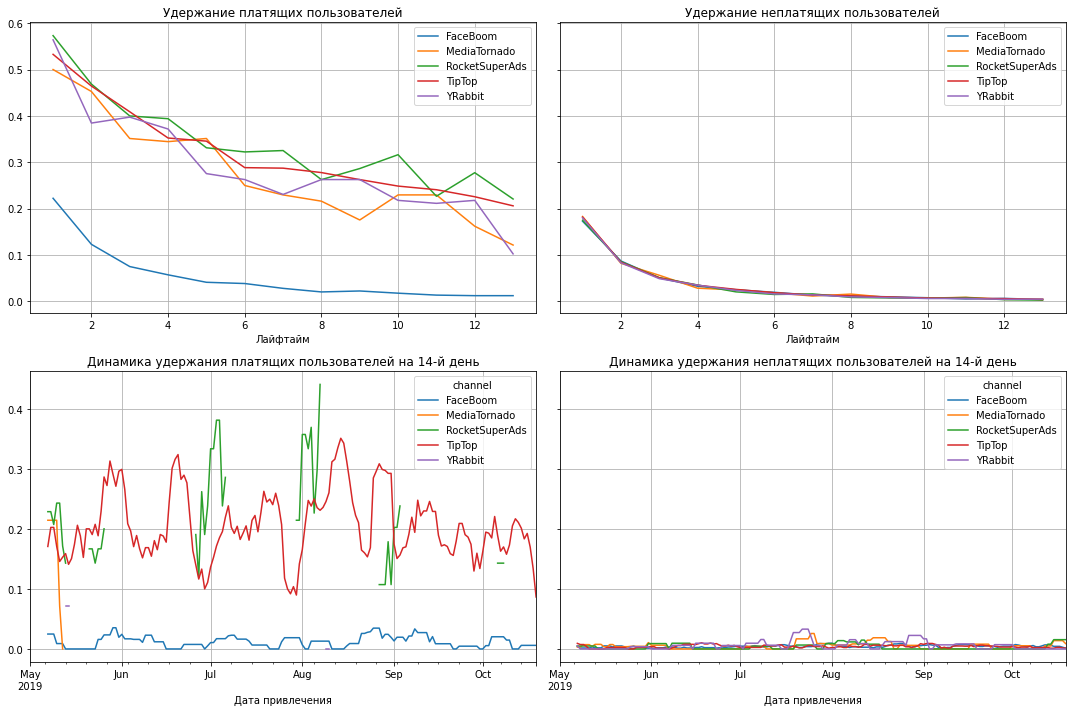

In [46]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles.query('channel != "organic" & region == "United States"'), visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

У FaceBoom худший показатель стабильно удержания.

Резюме:  
Пользрователи США не окупаются независимо от устройства, но только привлеченные по каналам FaceBoom и TipTop.  
При этом конверсия у FaceBoom и TipTop лучше, чем у пользователей из других каналов.  И у FaceBoom худший показатель стабильно удержания.

#### Окупаемость пользователей iPhone и Mac

Посмотрим на окупаемость пользователей iPhone и Mac в зависимости от региона.

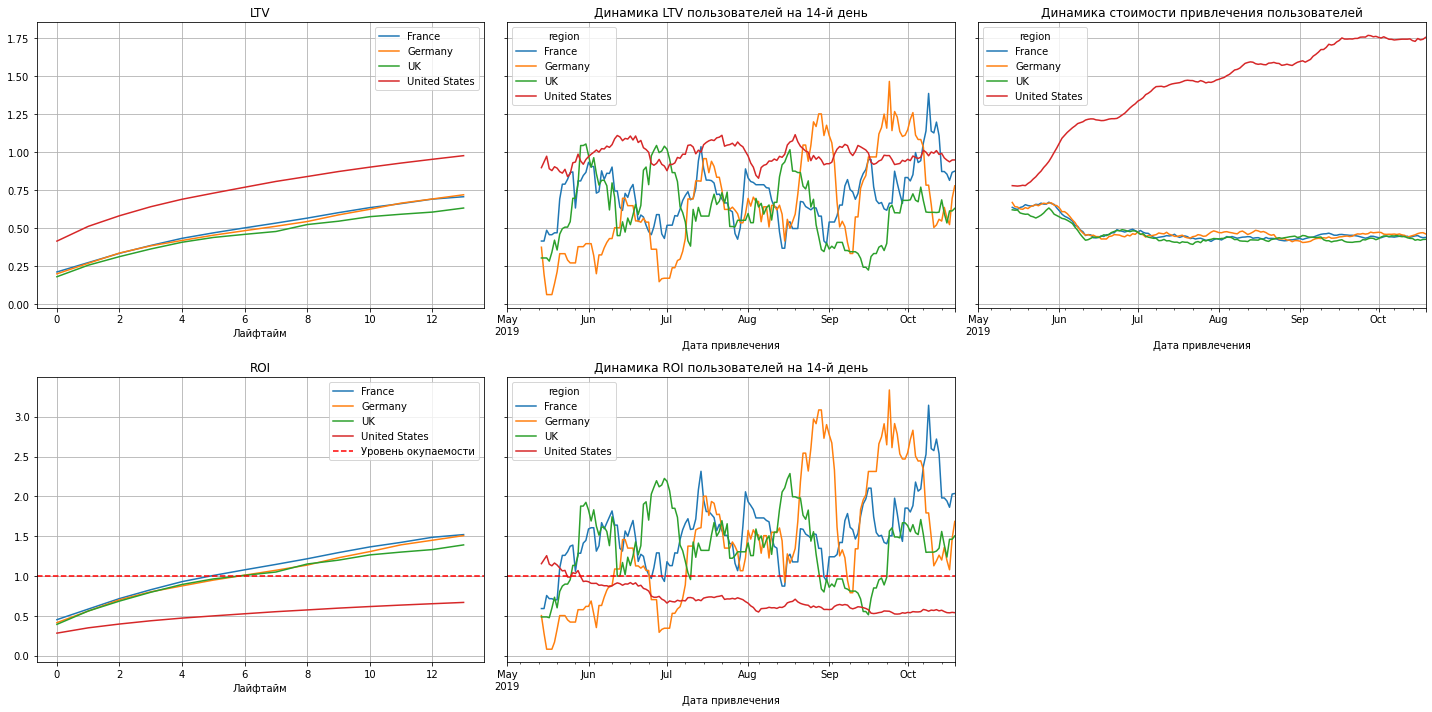

In [47]:
problem_devices = ['iPhone', 'Mac']
dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles.query('channel != "organic" & device in @problem_devices'), orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Как и для общей картины - не окупаются пользователи из США.

Возможно, пользователей с iPhone и Mac в США большинство, поэтому картина схожа с просто анализом. Проверим.

In [48]:
regions = (
    #группируем данные по региону
    profiles.groupby(['region'])
    #считаем количество уникальных пользователей
    .agg({'user_id': 'nunique' })
    #переименовываем колонку
    .rename(columns={'user_id': 'total_users'})
    #сбрасываем индексы
    .reset_index()
    #присоединяем таблицу с уникальными платящими пользователями сгруппированными по региону
    .merge(profiles.query('payer == True').groupby(['region'])
    .agg({'user_id': 'nunique' })
    .rename(columns={'user_id': 'payers'})
    .reset_index(), 
    on = 'region', how = 'left')
          )
#считаем процент платящих пользователей
regions['percentage_of_paying_users'] = regions['payers'] / regions['total_users'] * 100
#сортируем таблицу по убыванию значения процента платящих пользователей
regions = regions.sort_values(by='percentage_of_paying_users', ascending = False)

#объединим нашу таблицу с пользователями по регионам с группированной таблицей пользователей по регионам и устройствам
regions_check = regions[['region', 'total_users']].merge(profiles
                                         .pivot_table(index='region', 
                                                      columns='device', 
                                                      values='user_id', 
                                                      aggfunc='nunique'), 
                                         on='region', 
                                         how='left')
#сделаем название региона индексом
regions_check = regions_check.set_index('region')
#поделим все столбцы на общее число пользователей в регионе
regions_check = regions_check.div(regions_check['total_users'], axis=0)
regions_check

total_users   Android       Mac        PC    iPhone
region                                                            
United States          1.0  0.201986  0.248415  0.104318  0.445281
Germany                1.0  0.296375  0.105734  0.396836  0.201055
UK                     1.0  0.292518  0.101166  0.406145  0.200171
France                 1.0  0.300974  0.105330  0.397708  0.195989

Пользователей с iPhone и Mac действительно в США большенство - около 70%.

Посмотрим на окупаемость пользователей iPhone и Mac в зависимости от канала привлечения.

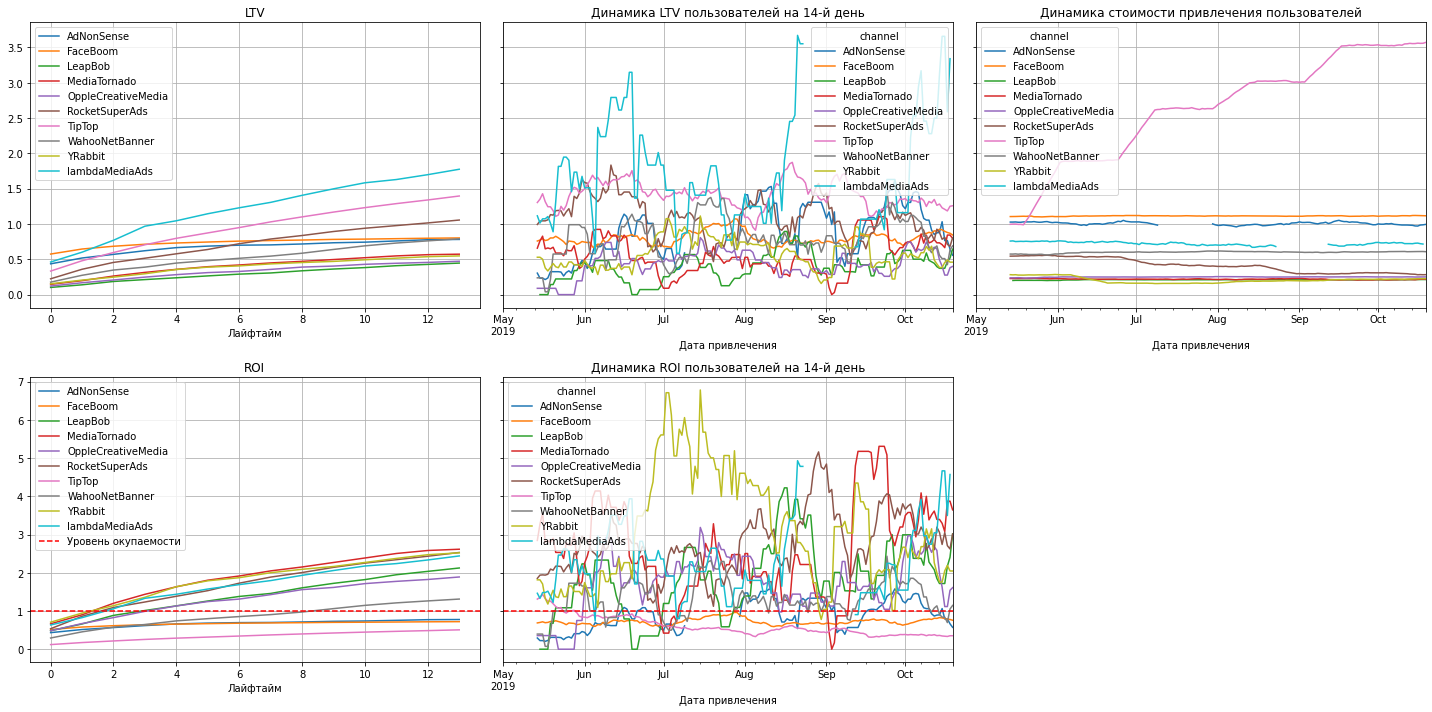

In [49]:
problem_devices = ['iPhone', 'Mac']
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles.query('channel != "organic" & device in @problem_devices'), orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

И тут, как в общей картине не акупаются пользователи, пришедшие из каналов FaceBoom, AdNonSense, TipTop.

Резюме:  
Для пользователей iPhone и Mac картина такая же, как и для пользователей других устройств. 


#### Окупаемость пользователей из каналов FaceBoom, AdNonSense, TipTop

Посмотрим на окупаемость пользователей пришедших из каналов в зависимости FaceBoom, AdNonSense, TipTop от региона.

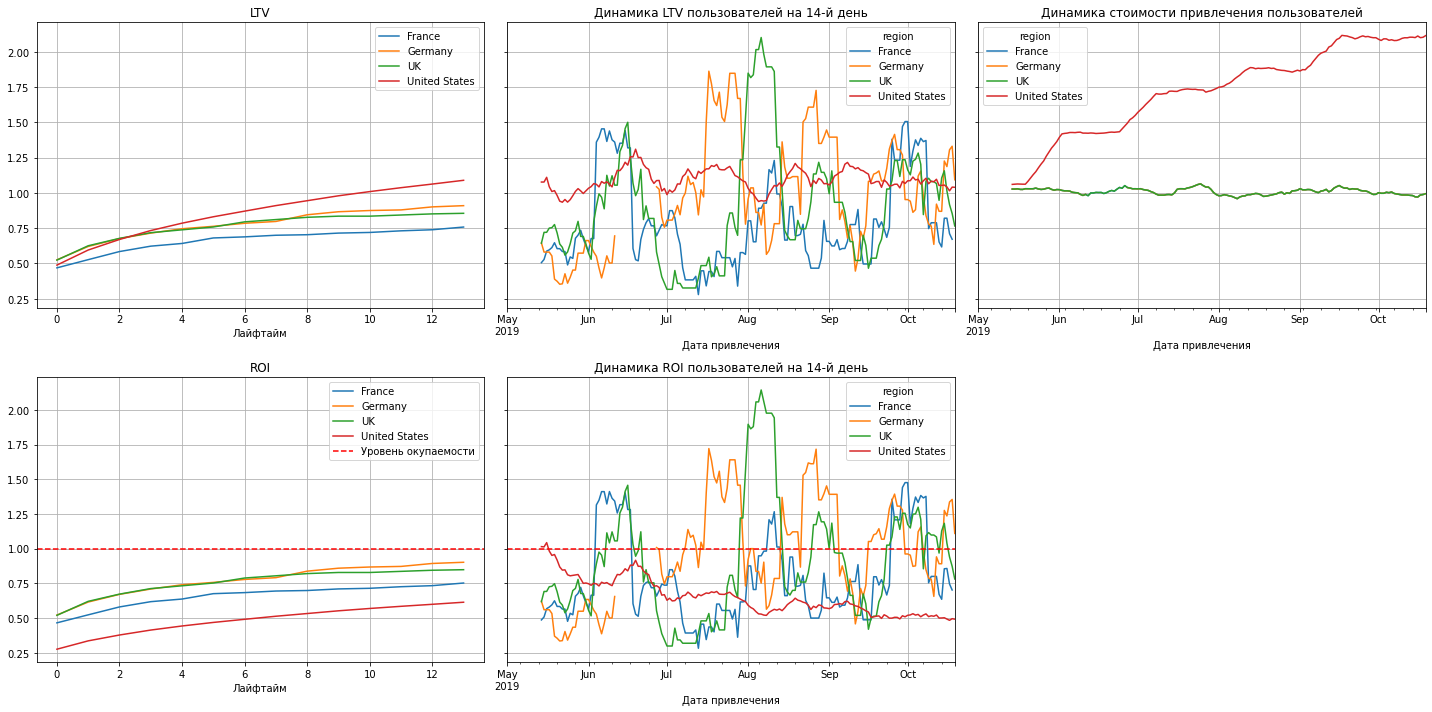

In [50]:
problem_region = ['FaceBoom', 'AdNonSense', 'TipTop']
dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles.query('channel != "organic" & channel in @problem_region'), 
    orders, 
    observation_date, 
    horizon_days, 
    dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Динамика ROI для большинства клиентов нестабильна для всех стран, кроме США, она идет на спад. При этом ни в одной стране не окупается реклама из этих каналов. Посмотрим на конверсию.

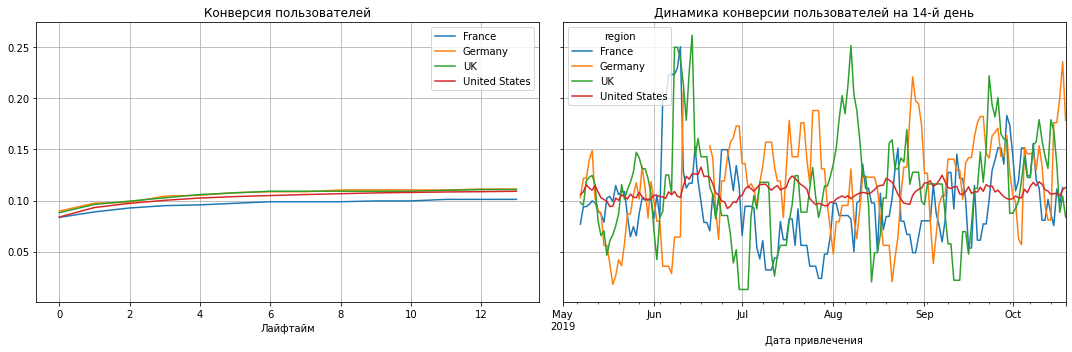

In [51]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles.query('channel != "organic" & channel in @problem_region'), 
    orders, 
    observation_date, 
    horizon_days, 
    dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

Конверсия стабильна для всех регионов.  Посмотрим на удержание.

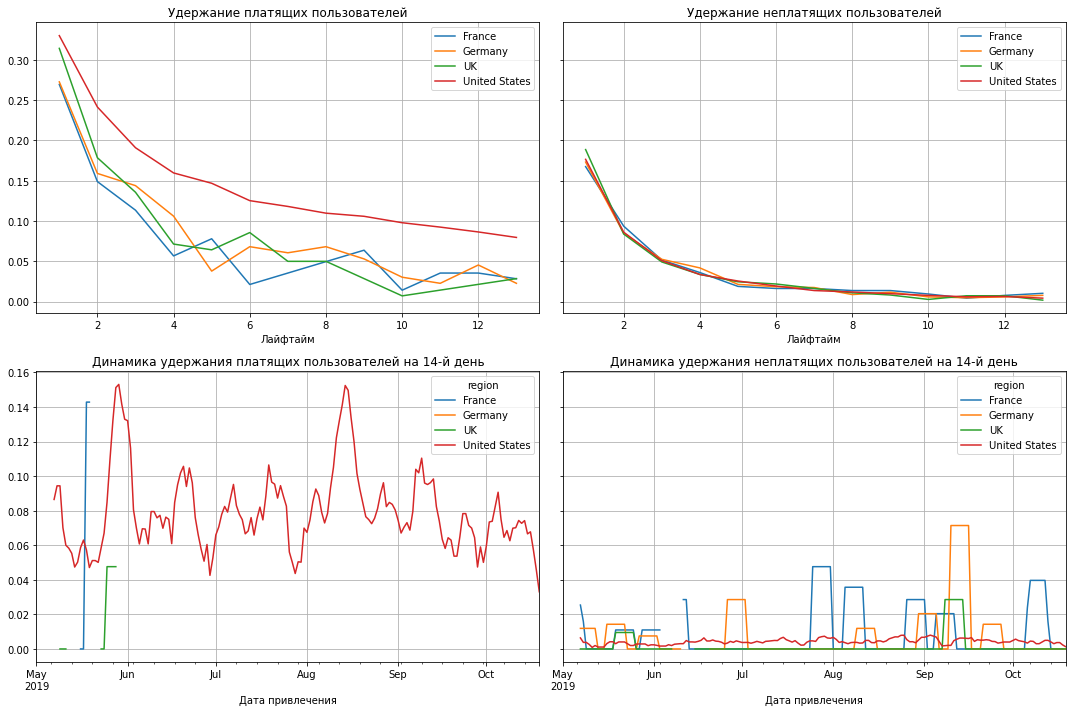

In [52]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles.query('channel != "organic" & channel in @problem_region'), 
    visits, 
    observation_date, 
    horizon_days, 
    dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Удержание в этих каналах схоже для всех регионов, для США даже лучше.

Резюме:  
Динамика ROI для большинства клиентов нестабильна для всех стран, кроме США, она идет на спад. При этом ни в одной стране не окупается реклама из этих каналов. 

## Напишите выводы

- Выделите причины неэффективности привлечения пользователей.
- Сформулируйте рекомендации для отдела маркетинга.

**ВЫВОД**  
Мы провели анализ данных развлекательного приложения Procrastinate Pro+ за период с 1 мая по 27 октября 2017 года.  
Мы провели предобработку данных: переименовали столбцы, изменили тип данных в столбцах с датами, проверили на дубликаты и пропуски.  
Всего на маркетинг потрачено 105479.  
В данных представлены пользователи из США, Франции, Германии, Великобритании. Больше всего пользователей из США (67%), и оттуда же самая большая доля платящих - 6,9%. Меньше всего пользователей из Германии, а самая малая доля платящих во Франции - 3,8%.  
Больше всего пользователей, в т.ч. и платящих пользуется платформой iPhone, на втором месте - Android. Но самый высокий процент платящих пользователей пользуется платформой Mac, хоть это и самая малочисленная платформа.   
Больше всего платящих пользователей приходит по каналу FaceBoom, при этом с этого канала самая большая доля платящих пользователей. С TipTop также приходит много платящих пользователей (по этому показателю этот канал второй), но доля платящих уступает AdNonSense и lambdaMediaAds, пользователей с которых приходит в разы меньше. По органическому поиску приходит много клиентов (третий показатель), но по доле платящих - это самый минимальный уровень.  
Самые большие расходы на маркетинг идут на канал TipTop, на втором месте FaceBoom, на все остальные каналы тратится в разы меньше. Можем сказать, что за исследуемый период расходы на эти каналы ( TipTop и FaceBoom) росли со временем. При этом, до увеличения бюджета пользователи с этих каналов окупались. На остальные каналы расходы относительно небольшие и не менялись практически со временем. При этом, до увеличения бюджета на канал TipTop пользователи оттуда окупались.  
Самая низкая стоимость привлечение покупателя у RocketSuperAds, а вот у TipTop стоимость привлечения покупателя в разы больше, чем у всех остальных каналов.  
ROI падает для всех пользователей за изучаемый период.  
Удержание пользователей схожа для пользователей всех устройств.  
Стоимость привлечения растет для всех пользователей.   
Не окупаются пользователи из США.  
Стоимость привлечения для клиентов из США растет, в отличии от других рынков.  
Ранее пользователи из США окупались.  
При этом конверсия у пользователей США лучше, чем у пользователей из других регионов.  
Удержание пользователей из США хуже, чем у пользователей из других регионов.  
Не окупаются пользователи из каналов TipTop, FaceBoom и AdNonSense.  
Стоимость привлечения для клиентов по TipTop растет, в отличии от других каналов.


**РЕКОМЕНДАЦИИ**  
Сделать упор на пользователей из США, т.к. это самая многочисленная группа:   
    Прекратить привлечение пользователей по каналу FaceBoom, перенаправить маркетинговый бюджет на другие каналы.  
    Для канала TipTop, до птого, как продолжить пользоваться им, выявить причину падения окупаемости, по сравнием с началом отчетного периода.
    Попробовать использовать, в качестве основного, канал RocketSuperAds, т.к. реклама через него окупается, на нем низкаяя стоимость привлечения и хорошие показатели удержания.
Для пользователей из других регионов прекратить пользоваться каналом AdNonSense и увеличить маркетинговый бюджет для канала lambdaMediaAds.  
Проработать увеличение доли и конверсии пользователей из органического поиска, т.к. это самый многочисленный канал, но самой низкой конверсией.
